### Base model
- CUMSUM
- SR
- PELT
- WBS
- BOCPD

**На данном этапе посмотрим на возможную реализацию базовых методов детекции разладки во временных рядах:**
1. Методы CUMSUM и SR можно считать базовыми средит статистических методов
2. Далее идут некоторые методы с модификациями, частичная реализация которых представлена в пакете ruptures

Реализация классов для детекции приводится в файле baseline_module.py, здесь приводится сравнительный анализ полученных резульатов, применение на симуляционных данных и тест на реальных собрианных данных.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ruptures as rpt


from scipy.stats import lognorm

import os


import yfinance as yf
import requests


from baseline_module import ChangePointDetection

In [4]:
returns = pd.read_csv("returns_crypto.csv").iloc[:,1:]
returns.head()

,BTC-USD,ETH-USD,USDT-USD,BNB-USD,XRP-USD,DOGE-USD,ADA-USD,TRX-USD,LINK-USD,BCH-USD,...,TRAC-USD,SC-USD,ELF-USD,QTUM-USD,BAT-USD,LRC-USD,DASH-USD,DCR-USD,GAS-USD,Date
0,-0.046991,-0.068333,-0.001158,-0.010225,-0.068094,-0.044836,-0.081062,-0.099265,-0.130579,-0.087767,...,-0.116799,-0.109805,-0.121305,-0.057361,-0.108823,-0.126726,-0.039344,-0.092243,-0.070334,2018-06-12
1,-0.035316,-0.038944,0.002758,-0.041842,-0.050219,-0.088054,-0.037080,-0.055682,-0.061714,-0.034527,...,-0.096486,-0.060820,-0.047805,-0.056788,-0.063299,-0.032789,-0.058051,-0.002946,-0.069776,2018-06-13
2,0.051253,0.088479,0.000418,0.020988,0.049831,0.045083,0.074603,0.093516,0.118578,0.063205,...,0.246639,0.170375,0.045171,0.048935,0.125883,0.079084,0.090922,0.148690,0.085001,2018-06-14
3,-0.032773,-0.055293,0.002988,0.010258,-0.042043,-0.014606,-0.055855,-0.056080,-0.068373,-0.053796,...,-0.051877,-0.079005,-0.012008,-0.042384,0.074454,-0.051358,-0.038249,-0.082695,-0.075215,2018-06-15
4,0.014494,0.017593,-0.002691,0.050578,-0.005436,-0.002068,0.001321,0.008048,-0.006866,0.003386,...,0.011107,-0.017341,0.033364,0.007297,0.024911,0.042775,0.031450,-0.008604,0.017073,2018-06-16


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.826 s


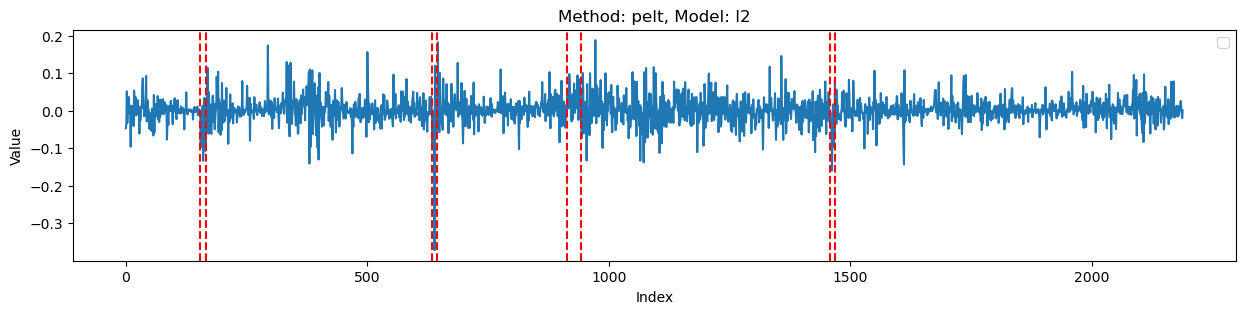

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.002 s


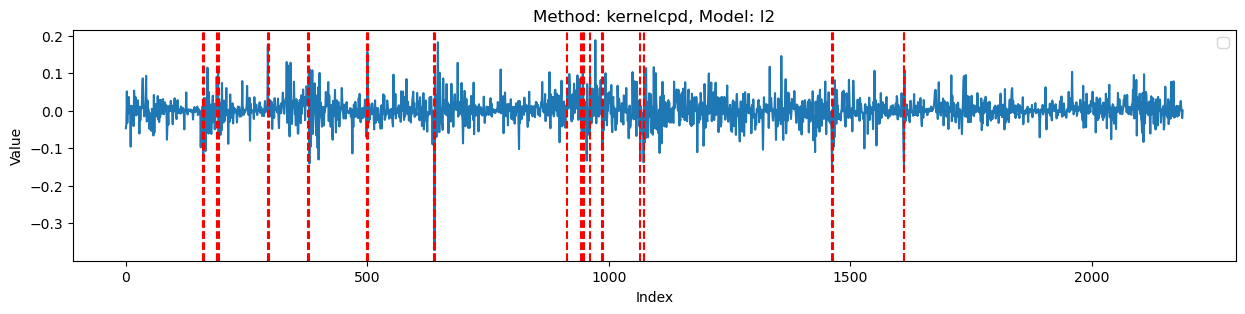

[160,
 162,
 188,
 192,
 294,
 296,
 378,
 380,
 500,
 502,
 638,
 640,
 914,
 942,
 946,
 948,
 961,
 986,
 988,
 1065,
 1073,
 1461,
 1463,
 1610,
 1612]

In [57]:
from baseline_module import ChangePointDetection

returns = pd.read_csv("returns_crypto.csv").iloc[:,1:]

dates = returns.Date
returns = returns['BTC-USD']  
df = pd.DataFrame({'Date': dates, 'Returns': returns})

cpd_pelt = ChangePointDetection(data=df['Returns'].values, method='pelt', model='l2', min_size=10, jump=2, metric='bic')
cpd_pelt.detect(graph = True)

cpd_pelt = ChangePointDetection(data=df['Returns'].values, method='kernelcpd', model='l2', min_size=5, jump=2, metric='bic')
cpd_pelt.detect(graph = True)

#### Отдельноое сравнение каждого метода


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.809 s


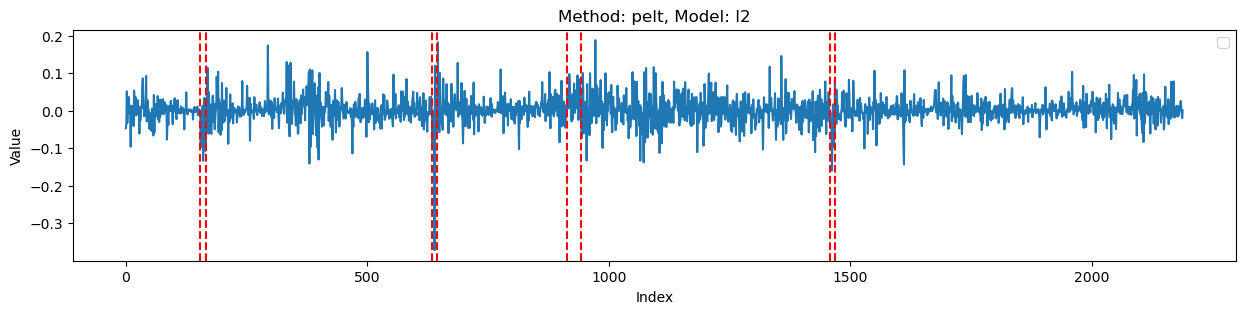

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.002 s


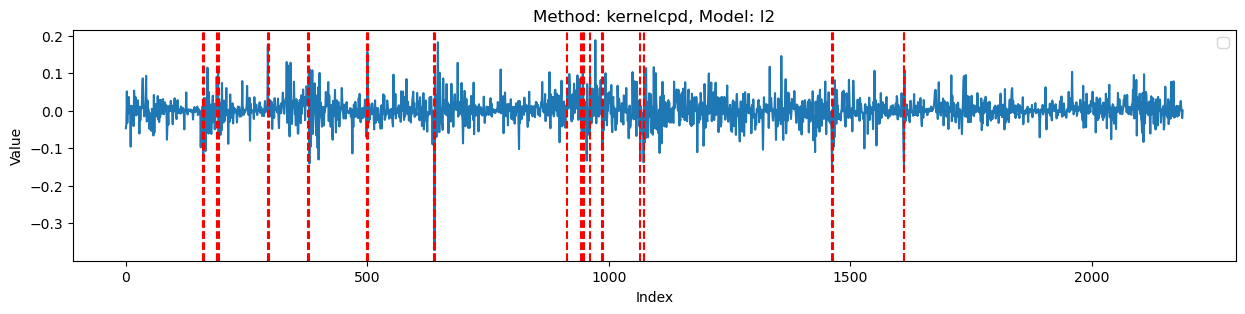

[160,
 162,
 188,
 192,
 294,
 296,
 378,
 380,
 500,
 502,
 638,
 640,
 914,
 942,
 946,
 948,
 961,
 986,
 988,
 1065,
 1073,
 1461,
 1463,
 1610,
 1612]

In [56]:
returns = pd.read_csv("returns_crypto.csv").iloc[:,1:]
dates = returns.Date
returns = returns['BTC-USD']  
df = pd.DataFrame({'Date': dates, 'Returns': returns})

cpd_pelt = ChangePointDetection(data=df['Returns'].values, method='pelt', model='l2', min_size=10, jump=2, metric='bic')
cpd_pelt.detect(graph = True)
cpd_pelt = ChangePointDetection(data=df['Returns'].values, method='kernelcpd', model='l2', min_size=5, jump=5, metric='bic')
cpd_pelt.detect(graph = True)

In [55]:
# размеченная точка разладки
change_points_true = pd.read_csv("btc_usd_cp.csv").iloc[:,1:]
change_points_true.head()

,date,value
0,2018-06-11,0.0
1,2018-06-12,0.0
2,2018-06-13,0.0
3,2018-06-14,0.0
4,2018-06-15,0.0


**Пример сравнения на синтетических данных**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1.761 s


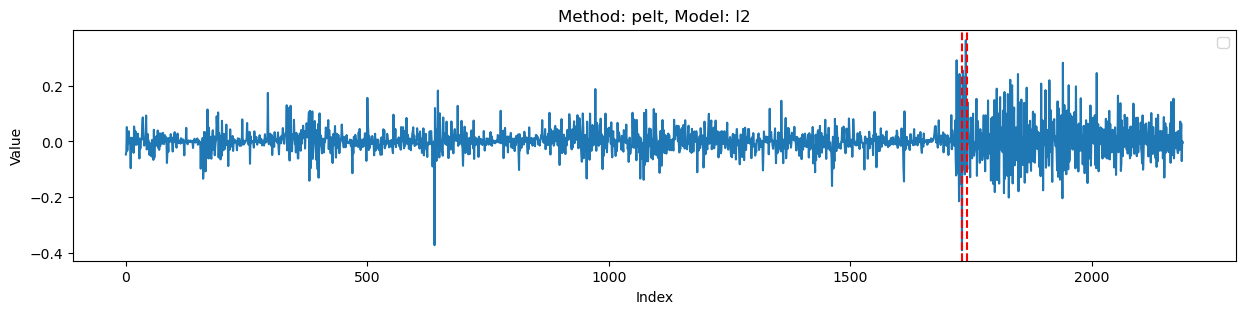

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.004 s


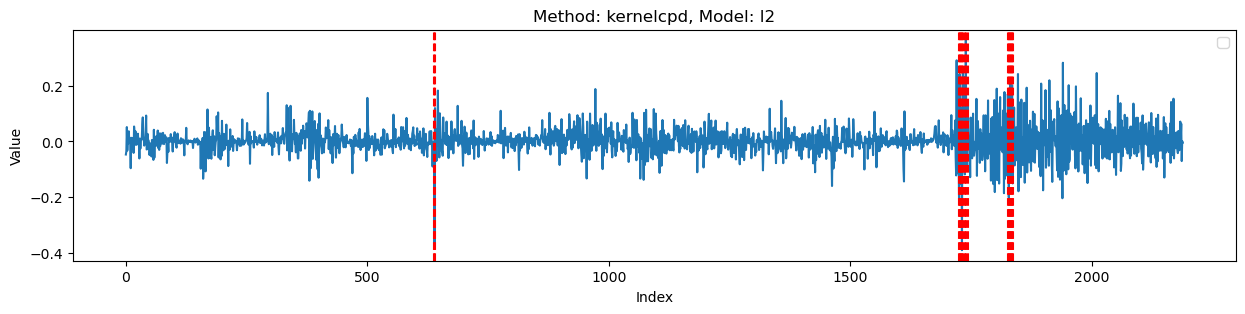

[638,
 640,
 1724,
 1726,
 1730,
 1732,
 1734,
 1738,
 1740,
 1743,
 1826,
 1828,
 1830,
 1832,
 1834,
 1836]

In [46]:
returns = pd.read_csv("btc_usd_ret.csv").iloc[:,1:]
change_points_true = pd.read_csv("btc_usd_cp.csv").iloc[:,1:]
dates = returns.date
returns = returns.value  
df = pd.DataFrame({'Date': dates, 'Returns': returns})

cpd_pelt = ChangePointDetection(data=df['Returns'].values, method='pelt', model='l2', min_size=10, jump=2, metric='bic')
cpd_pelt.detect(graph = True)

cpd_pelt = ChangePointDetection(data=df['Returns'].values, method='kernelcpd', model='l2', min_size=5, jump=2, metric='bic')
cpd_pelt.detect(graph = True)